In [1]:
import torch.nn.functional as F
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
import sys
import os

#상위 폴더로 이동
sys.path.append(os.path.abspath('..'))
from datas.dataset import make_dataset
from datas.config import cfg

In [3]:
batch_size = 8
image_size=cfg['image_size']
image_dir_train = 'train/'
csv_dir_train = 'train/'

image_dir_val = 'validation/'
csv_dir_val = 'validation/'

image_dir_test = 'test/'
csv_dir_test = 'test/'

# 데이터셋 생성
train_set = make_dataset(
    image_dir=image_dir_train,
    csv_dir=csv_dir_train,
    image_size=image_size
)

val_set = make_dataset(
    image_dir=image_dir_val,
    csv_dir=csv_dir_val,
    image_size=image_size
)

test_set = make_dataset(
    image_dir=image_dir_test,
    csv_dir=csv_dir_test,
    image_size=image_size
)

# DataLoader 생성
train_loader = DataLoader(
    train_set, 
    batch_size=batch_size,
    shuffle=True,
    pin_memory=True,
    num_workers=0
)

val_loader = DataLoader(
    val_set, 
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
    num_workers=0
)

test_loader = DataLoader(
    test_set, 
    batch_size=batch_size,
    shuffle=True,
)

In [4]:
# 데이터 로드 및 출력
images, labels, weight = next(iter(test_loader))

print(images.shape)
print(labels)
print(weight)

torch.Size([8, 6, 3, 224, 224])
tensor([2, 1, 2, 0, 1, 0, 0, 2])
tensor([252., 282., 260., 348., 282., 355., 353., 263.], dtype=torch.float64)


In [5]:
# 데이터 로드 및 출력
images, labels, weight = next(iter(train_loader))

print(images.shape)
print(labels)
print(weight)

torch.Size([8, 6, 3, 224, 224])
tensor([0, 0, 1, 1, 0, 2, 2, 1])
tensor([379., 355., 282., 275., 335., 249., 255., 293.], dtype=torch.float64)


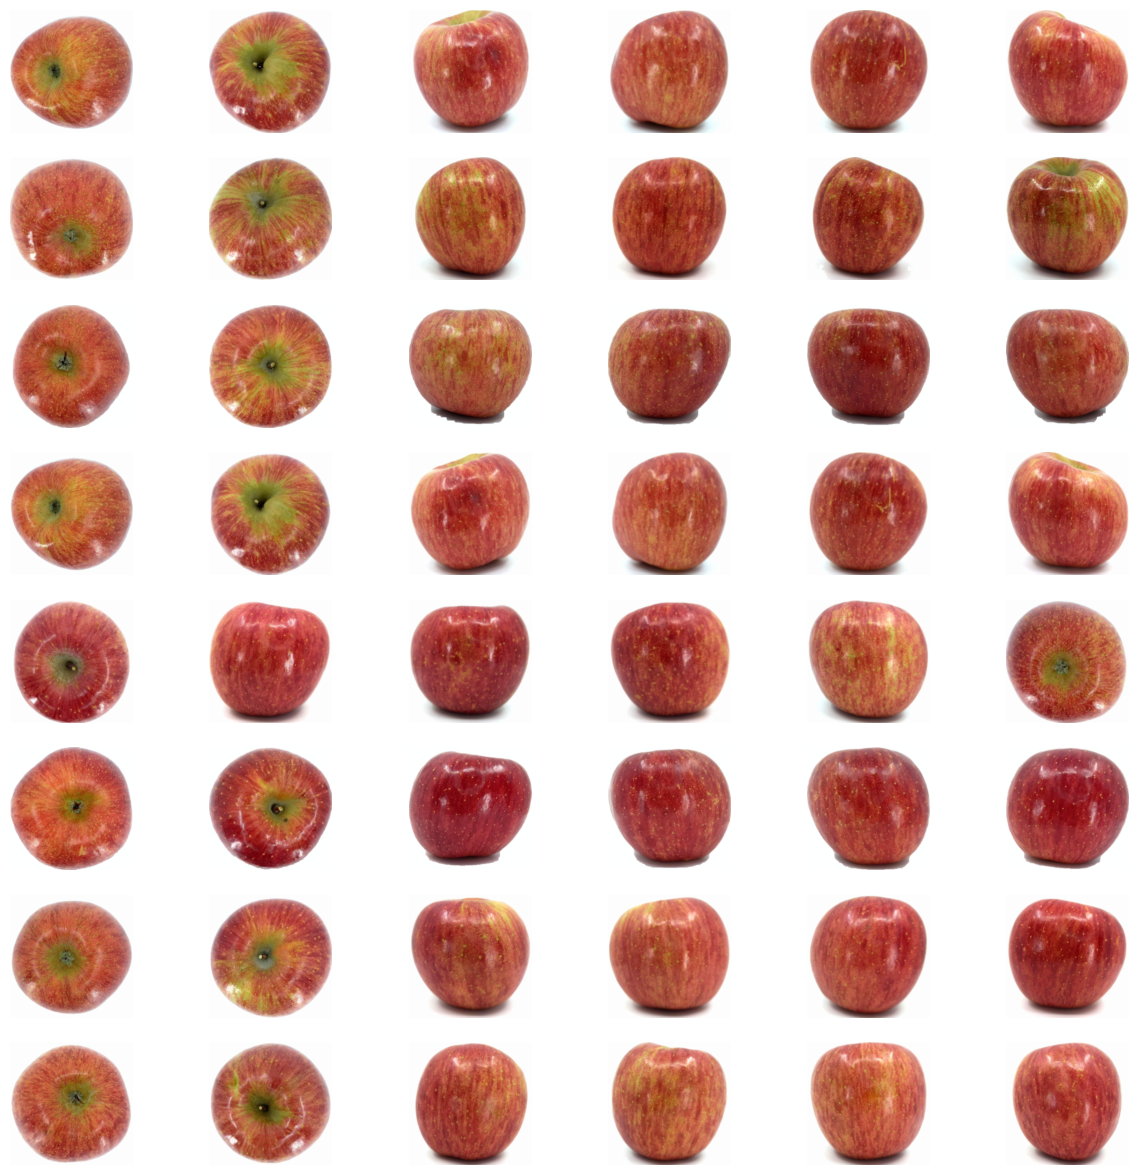

In [15]:
import matplotlib.pyplot as plt
import torchvision

# 데이터 로드
images, labels, weight = next(iter(test_loader))

def show_all_images(images, labels, weight):
    batch_size, num_angles, _, _, _ = images.shape
    fig, axes = plt.subplots(batch_size, num_angles, figsize=(15, 15))

    for i in range(batch_size):
        for j in range(num_angles):
            img = images[i][j].numpy().transpose((1, 2, 0))  # 채널 차원을 마지막으로 이동
            img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Normalize reverse
            img = img.clip(0, 1)  # 이미지를 [0, 1] 범위로 클리핑

            axes[i, j].imshow(img)
            if j == 0:
                axes[i, j].set_ylabel(f'Label: {labels[i]}\nweight: {weight[i]:.1f}')
            axes[i, j].axis('off')

    plt.show()

# 시각화 함수 호출
show_all_images(images, labels, weight)